In [ ]:
%pip install ipywidgets sympy mpl-pan-zoom numpy matplotlib ipympl

In [2]:
# https://github.com/mpl-extensions/mpl-pan-zoom/blob/823829ea774655701ffa6bbded1a97b4a9bf6f23/mpl_pan_zoom/_zoom.py#L9
def zoom_factory(ax, base_scale=1.1, action = None):
    """
    Add ability to zoom with the scroll wheel.


    Parameters
    ----------
    ax : matplotlib axes object
        axis on which to implement scroll to zoom
    base_scale : float
        how much zoom on each tick of scroll wheel

    Returns
    -------
    disconnect_zoom : function
        call this to disconnect the scroll listener
    """

    def limits_to_range(lim):
        return lim[1] - lim[0]

    fig = ax.get_figure()  # get the figure of interest
    if hasattr(fig.canvas, "capture_scroll"):
        fig.canvas.capture_scroll = True
    has_toolbar = hasattr(fig.canvas, "toolbar") and fig.canvas.toolbar is not None
    if has_toolbar:
        # it might be possible to have an interactive backend without
        # a toolbar. I'm not sure so being safe here
        toolbar = fig.canvas.toolbar
    orig_xlim = ax.get_xlim()
    orig_ylim = ax.get_ylim()
    orig_yrange = limits_to_range(orig_ylim)
    orig_xrange = limits_to_range(orig_xlim)
    orig_center = ((orig_xlim[0] + orig_xlim[1]) / 2, (orig_ylim[0] + orig_ylim[1]) / 2)

    def zoom_fun(event):
        if has_toolbar:
            toolbar.push_current()
        if event.inaxes is not ax:
            return
        # get the current x and y limits
        cur_xlim = ax.get_xlim()
        cur_ylim = ax.get_ylim()
        xdata = event.xdata  # get event x location
        ydata = event.ydata  # get event y location
        if event.button == "up":
            # deal with zoom in
            scale_factor = base_scale
        elif event.button == "down":
            # deal with zoom out
            scale_factor = 1 / base_scale
        else:
            # deal with something that should never happen
            scale_factor = 1
        # set new limits
        new_xlim = [
            xdata - (xdata - cur_xlim[0]) / scale_factor,
            xdata + (cur_xlim[1] - xdata) / scale_factor,
        ]
        new_ylim = [
            ydata - (ydata - cur_ylim[0]) / scale_factor,
            ydata + (cur_ylim[1] - ydata) / scale_factor,
        ]
        ax.set_xlim(new_xlim)
        ax.set_ylim(new_ylim)
        if action is not None:
            action(ax)
        ax.figure.canvas.draw_idle()  # force re-draw

    # attach the call back
    cid = fig.canvas.mpl_connect("scroll_event", zoom_fun)

    def disconnect_zoom():
        fig.canvas.mpl_disconnect(cid)

    # return the disconnect function
    return disconnect_zoom

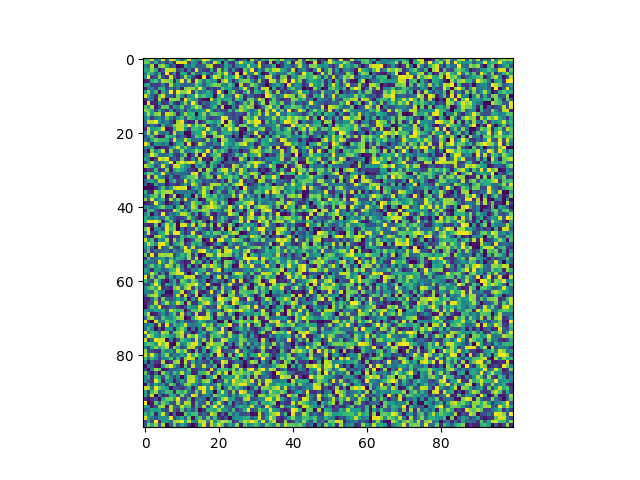

In [6]:
%matplotlib widget
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    pass
import matplotlib.pyplot as plt
import numpy as np

with plt.ioff():
    figure, ax = plt.subplots()
X = data = np.random.random((100,100))

def set_data(ax):
    X = data = np.random.random((100,100))
    ax_img.set_data(X)
    figure.canvas.draw_idle()

zoom_factory(ax, action = set_data)
ax_img = ax.imshow(X)
figure.show()